In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/claims_classif.csv')

In [2]:
df.head()

,Claim,Policy_Duration,Premium
0,0,5.50,375
1,0,3.69,349
2,0,4.84,376
3,0,5.00,364
4,0,4.69,355


<Axes: xlabel='Policy_Duration', ylabel='Claim'>

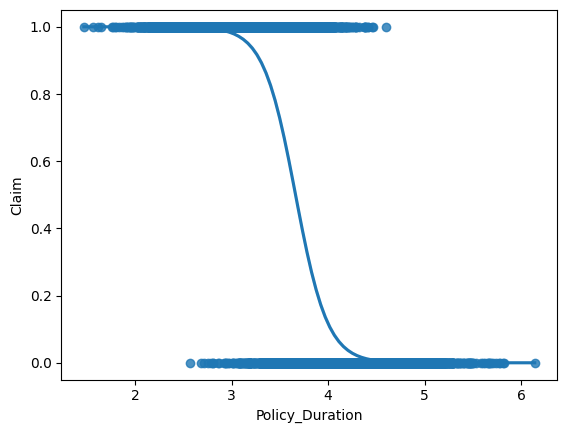

In [4]:
import seaborn as sns
sns.regplot(x = 'Policy_Duration', y='Claim', data = df, logistic=True)

<Axes: xlabel='Premium', ylabel='Claim'>

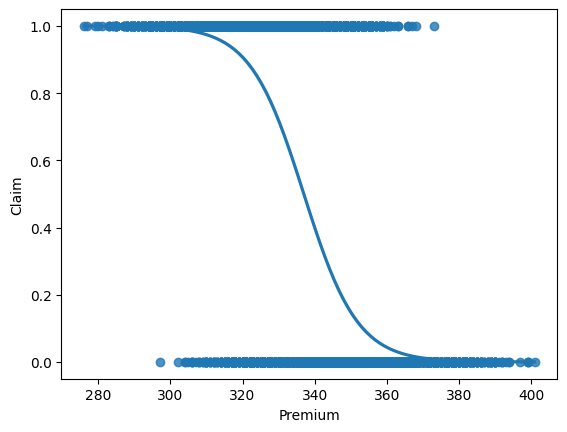

In [5]:
sns.regplot(x = 'Premium', y='Claim', data = df, logistic=True)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Premium','Policy_Duration']],df['Claim'] ,test_size=0.2)
X_train.head(3)

,Premium,Policy_Duration
2767,344,3.92
9244,322,3.07
2911,353,4.25


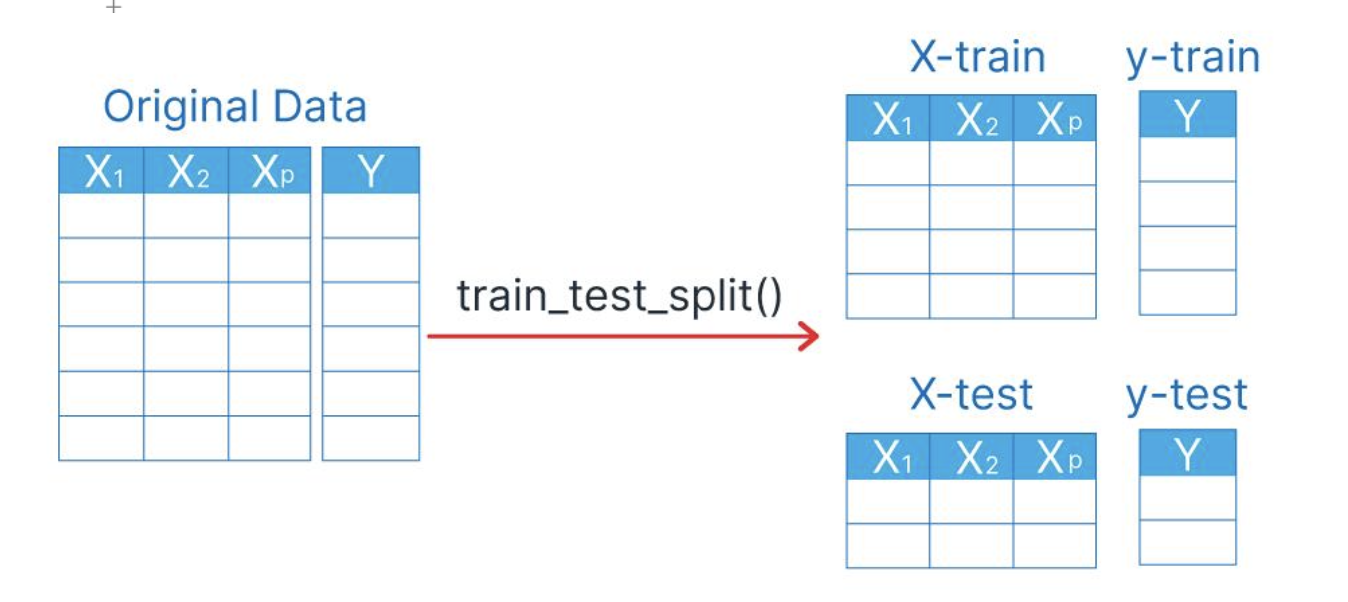

In [7]:
import sklearn.linear_model as skl_lm
rlog = skl_lm.LogisticRegression()
rlog.fit(X_train,y_train)
train_accuracy= rlog.score(X_train,y_train)*100
train_accuracy

91.875

In [10]:
from sklearn.linear_model import LogisticRegression
rlog = LogisticRegression()
rlog.fit(X_train,y_train)
train_accuracy= rlog.score(X_train,y_train)*100
train_accuracy

91.875

In [11]:
preds = rlog.predict(X_test)
preds

array([1, 1, 1, ..., 1, 0, 0])

In [13]:
y_test

6057    1
283     0
9344    1
7218    1
1705    0
       ..
8059    1
7437    1
7619    1
860     0
3967    0
Name: Claim, Length: 2000, dtype: int64

In [14]:
sum(preds == y_test)/len(preds)

0.9215

[[941  71]
 [ 86 902]]


<Axes: >

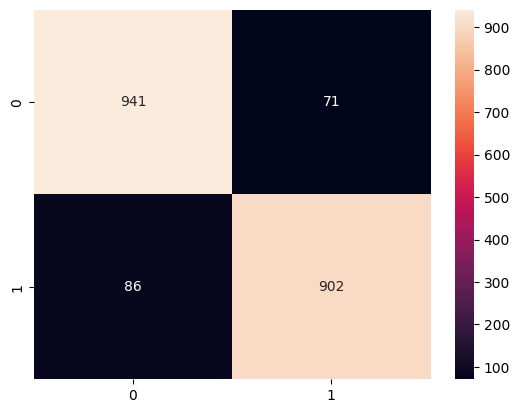

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1012
           1       0.93      0.91      0.92       988

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



# Exercicio

In [44]:
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20okk.csv')
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inadimplente      100 non-null    int64  
 1   Genero            100 non-null    int64  
 2   GrauEscolaridade  100 non-null    int64  
 3   Profissao         100 non-null    int64  
 4   Renda             100 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [38]:
treino.columns

Index(['Inadimplente', 'Genero', 'GrauEscolaridade', 'Profissao', 'Renda'], dtype='object')

In [ ]:
X_train = treino[['Genero', 'GrauEscolaridade', 'Profissao', 'Renda']]
y_train = treino[['Inadimplente']]

In [43]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20prever2.csv')
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inadimplente      8 non-null      int64  
 1   Genero            8 non-null      int64  
 2   GrauEscolaridade  8 non-null      int64  
 3   Profissao         8 non-null      int64  
 4   Renda             8 non-null      float64
dtypes: float64(1), int64(4)
memory usage: 452.0 bytes


In [39]:
X_test = teste[['Genero', 'GrauEscolaridade', 'Profissao', 'Renda']]
y_test = teste[['Inadimplente']]

In [40]:
import sklearn.linear_model as skl_lm
nbrlog = skl_lm.LogisticRegression()
rlog.fit(X_train,y_train)
train_accuracy= rlog.score(X_train,y_train)*100
train_accuracy

100.0

In [54]:
preds = nb.predict(X_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[[6 0]
 [0 2]]


<Axes: >

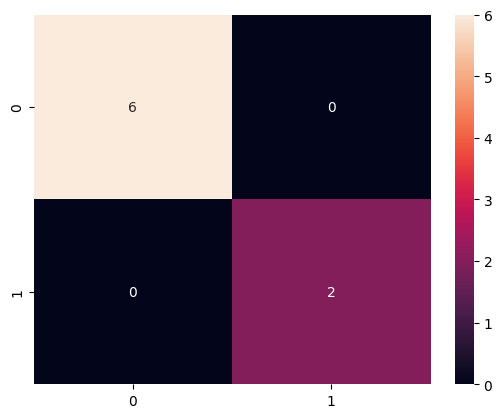

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

# Bayes

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/weather_loss.csv')
df

,quake_lvl,flood_lvl,hurricane_lvl,wildfire_lvl,sig_material_loss
0,8,0,0,1.0,1
1,0,0,4,0.0,1
2,8,0,4,0.7,0
3,0,0,0,1.0,1
4,8,0,4,1.0,1
...,...,...,...,...,...
95,8,5,2,1.0,1
96,5,10,4,0.0,1
97,8,0,2,0.0,1
98,0,10,4,1.0,1


In [47]:
df.columns

Index(['quake_lvl', 'flood_lvl', 'hurricane_lvl', 'wildfire_lvl',
       'sig_material_loss'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['quake_lvl', 'flood_lvl', 'hurricane_lvl', 'wildfire_lvl']],df['sig_material_loss'] ,test_size=0.2)
X_train.head(3)

,quake_lvl,flood_lvl,hurricane_lvl,wildfire_lvl
48,5,0,0,0.0
66,0,5,4,1.0
46,5,0,4,0.0


In [49]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
acuracia_treino = nb.score(X_train, y_train)
acuracia_treino * 100

77.5

In [56]:
preds = nb.predict(X_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[[ 0  2]
 [ 0 18]]


<Axes: >

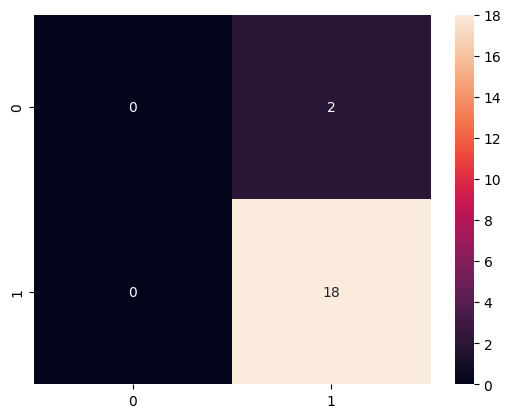

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

# Trabalhinho

In [65]:
treino = pd.read_csv('/Users/jeffsantos/Desktop/9DTSR/git/9DTSR/Machine Learning/Prática/archive (1)/train.csv')
treino

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [68]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [67]:
teste = pd.read_csv('/Users/jeffsantos/Desktop/9DTSR/git/9DTSR/Machine Learning/Prática/archive (1)/test.csv')
teste

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
39059,ID97652,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
39060,ID97653,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
39061,ID97654,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
